In [17]:
import xarray as xr
import numpy as np
from math import pi
import datetime as dt
import os
import sys
from pathlib import Path
from os.path import exists
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pathlib import Path

def get_data():
    from pathlib import Path
    filelist=[]
    dir_data = 'F:/data/sst/jpl_mur/v4.1/'
    for filename in Path(dir_data).rglob('*90000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'):
        filelist.append(filename)
    ds=xr.open_mfdataset(filelist,combine='nested',concat_dim='time')#.rename({'latitude':'lat','longitude':'lon'})
    ds = ds.resample(time='M',keep_attrs=True).mean(skipna=False,keep_attrs=True)
    return ds

In [18]:
#    ds = ds.isel(time=0).sel(lat=slice(20,90))
#    ds.coords['lon'] = np.mod(ds['lon'], 360)
#    ds = ds.sortby(ds.lon).sel(lon=slice(160,260))               
dir_timeseries='F:/data/NASA_biophysical/blob/'
date_start,date_end,date_end2='2003-01-01','2017-12-31','2019-10-01'
ds= get_data()
ds_tem=ds.sel(time=slice(date_start,date_end))
data_climatology = ds_tem.groupby('time.month').mean('time',keep_attrs=True,skipna=False)
ds_tem=ds.sel(time=slice(date_start,date_end2))
data_anomaly = ds_tem.groupby('time.month') - data_climatology
global_attributes = ds_tem.attrs
data_anomaly.attrs = global_attributes


In [19]:
ds
#ds_tem=ds.sel(time=slice(date_start,date_end))
#ds_tem

<xarray.Dataset>
Dimensions:           (lat: 17999, lon: 36000, time: 210)
Coordinates:
  * time              (time) datetime64[ns] 2002-06-30 2002-07-31 ... 2019-11-30
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -179.99 -179.98 -179.97 ... 179.99 180.0
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 17999, 36000), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.

In [ ]:
ds

MemoryError: Unable to allocate array with shape (1, 17999, 36000) and data type float32

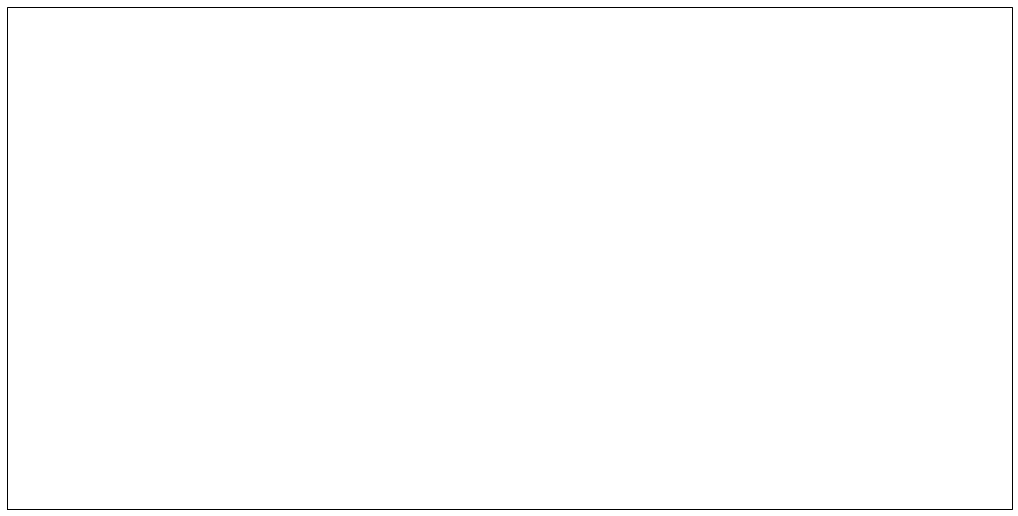

In [36]:
#make oscar timeseries
#for ibox in range(0,2): #5):
#a
from matplotlib.lines import Line2D 
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import cartopy.crs as ccrs
fig = plt.figure(figsize=(18,10))
ax0 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
#fig, axes = plt.subplots(1, 1,figsize=(20,6),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
import datetime
import datetime as dt

time_start = time_now = dt.datetime(2002, 6, 1) # from this date (included)
time_stop = dt.datetime(2002, 7, 3)     # to that date (excluded)
while time_now<time_stop:
    year = str(time_now.year)
    month = str(time_now.month).zfill(2)
    ds_tem=ds.sel(time=time_now,method='nearest').sel(lat=slice(20,90))
    ds_tem.coords['lon'] = np.mod(ds_tem['lon'], 360)
    ds_tem = ds_tem.sortby(ds_tem.lon).sel(lon=slice(160,260))               
    im = ax0.pcolormesh(ds_tem.lon.values,ds_tem.lat.values,ds_tem.analysed_sst,transform=ccrs.PlateCarree(),cmap='rainbow');
    ax0.set_global(); ax0.coastlines();
    ax0.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
    ax0.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    ax0.xaxis.set_major_formatter(lon_formatter)
    ax0.set_xlim(-80,80); ax0.set_ylim(15,65)
    ax0.set_title(darray[itype])      
    fig.savefig(dir_figs + 'blob'+year+month+'.png', dpi=300)
    dt += timedelta(months=1)

           